# KNN From Scratch

Import the operator library for sort the list with a key

In [1]:
import operator

## Eculidian Distance
We choose the Euclidian distance, so we make a function to calculate it for the test elements with all the trained elements.

It is very easy to understand; the input are only 2 elements, the test and the trained element, where both are a list, then for each element of the lists we perform their substraction to the power of 2 and add it to another variable which will have the sum of all the substractions and then we return the square root of that variable. I.E.

$$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + ... + (z_1 - z_2)^2 }$$

In [2]:
def euclidean_distance(test_set, trained_set):
    distance = 0
    for x in range(len(test_set)):
        distance += pow((test_set[x] - trained_set[x]), 2)
    return distance**0.5

### Obtain the K Nearest Neighbors
- For each element in the training set we get their distance with the test element with the previous function
- Create a list that have the elements with their distances
- Sort the list of the distances with a key (distance value)
- Return the k first elements of the list, we only return the elements, not their distance

In [3]:
def get_neighbors(training_set, test_instance, k):
    distances = []
    for x in range(len(training_set)):
        dist = euclidean_distance(test_instance, training_set[x])
        distances.append((training_set[x], dist))
    #print('distances\n' ,distances)
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

## Get the class of the new element
- Create a dictionary to find out which is the most repeated class in the k nearest neighbors, for that we traverse the list of the K nearest neighbors and every time we pass a class, we add one to its frequence.
- We sort the dictionary and the first element is the most repeated class, that is the majority class of the nearest neighbors, so we return the sorted dictionary and the neighbors.

In [4]:
def predict_classification(training_set, test_instance, k):
    neighbors = get_neighbors(training_set, test_instance, k)
    frequency = {}
    for x in range(len(neighbors)):
        clase = neighbors[x][-1]
        if clase in frequency:
            frequency[clase] += 1
        else:
            frequency[clase] = 1
    sorted_class = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
    print("sorted class",sorted_class)
    ans=[sorted_class[0][0], neighbors]
    return ans

## Main Function
- Initialize the training and the test set
- Give a value to K (this has to be odd to avoid ties)
- Send values to the previous functions to determine the class

In [5]:
test_instance = [6.2, 3.4, 5.4, 2.3]
training_set = [[5.1, 3.5, 1.4, 0.2, 0],
                [4.9, 3.0, 1.4, 0.2, 0],
                [5.8, 2.6, 4.0, 1.2, 1],
                [6.7, 3.0, 5.2, 2.3, 1],
                [6.0, 3.4, 4.5, 1.6, 0]]

k = 3
predicted_class, neighbors = predict_classification(training_set, test_instance, k)
print(predicted_class)

sorted class [(1, 2), (0, 1)]
1


## Plot the new point with its neighbors
- Separate the characteristics and its class labels of the elements,since we only need its characteristics to plot it and its label to give them a color, Yellow for 1 and Purple for 0.
- Plot the trained and test point, this last one will have a 'X' mark
- Plot the distance between the K Nearest Neighbors with the test point


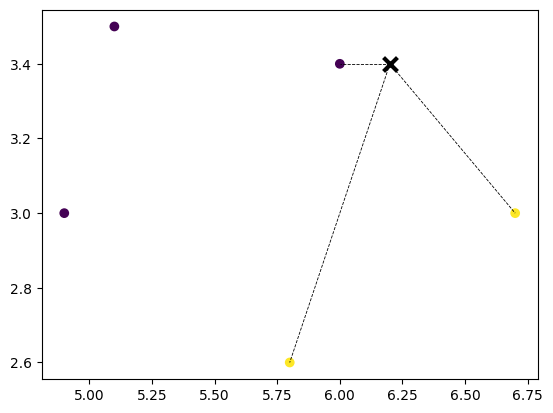

In [6]:
import matplotlib.pyplot as plt

def plot_neighbors(training_set, test_instance, k, neighbors):
    train_features = [x[:-1] for x in training_set]
    train_labels = [x[-1] for x in training_set]
    test_features = test_instance[:-1]

    plt.scatter([x[0] for x in train_features], [x[1] for x in train_features], c=train_labels)
    plt.scatter(test_features[0], test_features[1], marker='x', s=100, linewidths=3, color='black')

    for neighbor in neighbors:
        plt.plot([test_features[0], neighbor[0]], [test_features[1], neighbor[1]], 'k--', linewidth=0.6)

    plt.show()

k = 3
plot_neighbors(training_set, test_instance, k, neighbors)